In [ ]:
import sys
import os
import numpy as np
import warnings
import geopandas as gpd
import folium
import contextily as cv

# path to folder to CityGeoTools
folder = "/var/essdata/IDU/other/Rest_/refactored/CityGeoTools"
sys.path.append(folder)

from metrics.data import CityInformationModel as BaseModel
from metrics.calculations import CityMetricsMethods as CityMetrics
from metrics.calculations import utils

warnings.simplefilter(action='ignore')

### Visibility analysis

The metric allows you to build a visibility zone (or visibility area) that shows the effects of current urban development on how far people can see an open space from a certain position.   

To call the metric, first create your own City Information Model (the way how it shows [here](https://github.com/iduprojects/CityGeoTools/blob/master/notebook_examples/create_city_information_model.ipynb)) and upload the [following files](https://github.com/iduprojects/CityGeoTools/tree/master/data_specification/visibility_analysis) into it:
- geojson file with urban buildings.

In [ ]:
city_model = BaseModel.CityInformationModel(city_name="Saint-Petersburg", city_crs=32636, cwd="../")
city_model.update_layer("Buildings", "./data/buildings.geojson")

To build visibility zone, create an instanse of VisibilityAnalysis class and call the method get_visibility_result with specified arguments:

**point** - list of integer (point coordinates in EPSG 4326)  
**view_distance** - integer (distance of overview in meter)

In [ ]:
# project point from EPSG 4326 to EPSG 32636

point = [[59.942, 30.303]]
point = utils.request_points_project(point, set_crs=4326, to_crs=32636)[0]

In [ ]:
if city_model.methods.if_method_available("visibility_analysis"):
    visibility_zone = CityMetrics.VisibilityAnalysis(city_model).get_visibility_result(point=point, view_distance=250)
    visibility_zone_gdf = gpd.GeoDataFrame.from_features(visibility_zone).set_crs(4326)

In [ ]:
map = folium.Map(location = [59.942, 30.303], zoom_start = 17, tiles='CartoDB positron')
geo_j = folium.GeoJson(data=visibility_zone_gdf, style_function=lambda x: {'fillColor': 'orange'})
folium.Marker([59.942, 30.303]).add_to(map)
geo_j.add_to(map)
map

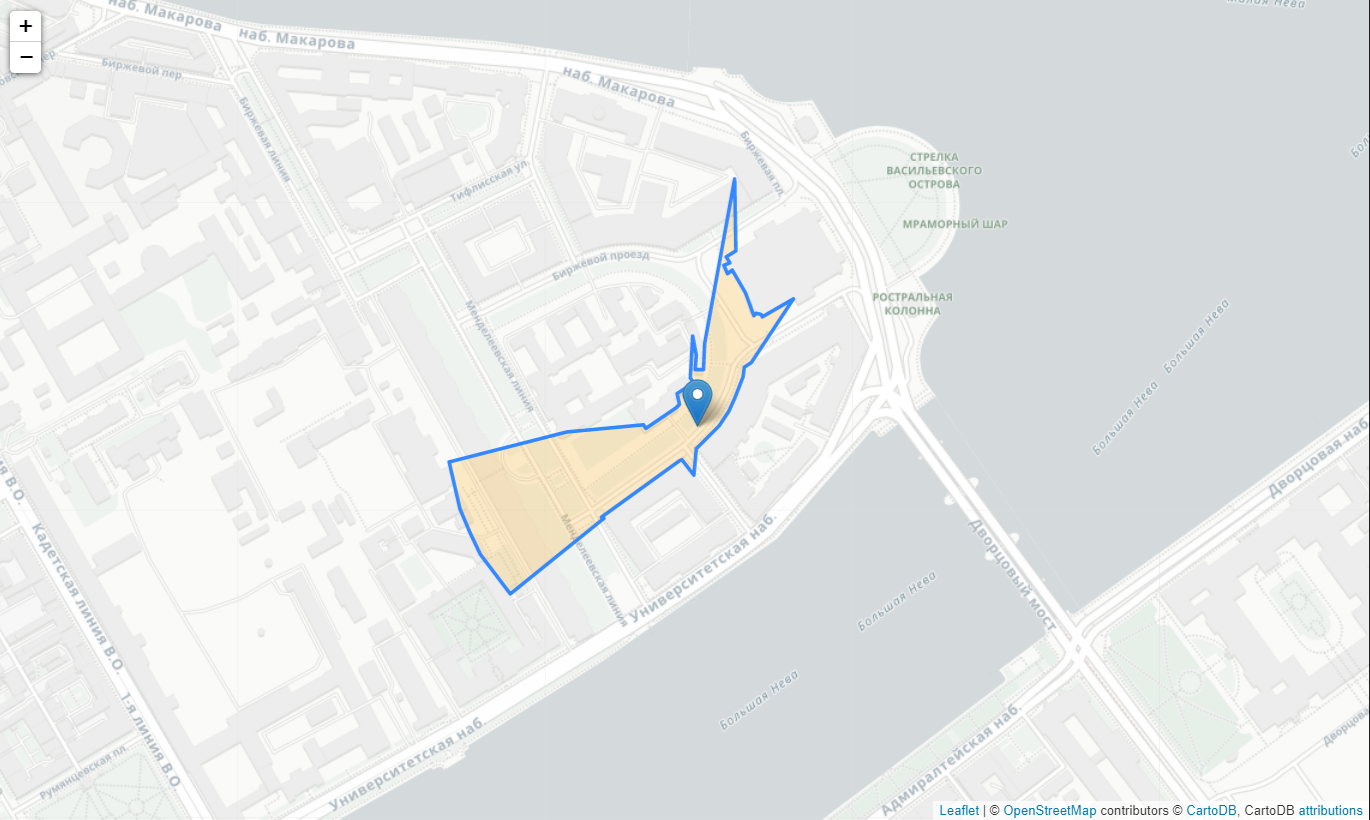

In [13]:
from IPython.display import Image, display
display(Image(filename='../img/visibility_analysis.png', embed=True))